# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ="../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,428,429,430,431,432,433,434,435,436,437
0,1,-0.315205,-0.407536,0.531673,0.808408,-0.810542,0.193779,0.034024,-0.164311,0.014579,...,0.646639,-0.484226,0.024023,0.428195,-0.997664,-0.198929,0.558472,-0.711090,-0.625051,1.313173
1,0,-0.399706,-0.359715,0.589118,0.689009,-0.934274,0.590328,0.000470,-0.579490,-0.014040,...,0.367153,-0.127431,0.453080,0.222101,0.063686,-0.350376,0.585483,-0.723964,-0.614908,1.041820
2,2,-0.257777,0.017325,-0.369965,0.256681,-0.647283,-0.009628,0.178241,0.039518,-0.395371,...,-0.180099,0.149861,0.336687,0.759315,-0.011072,0.195970,0.454717,0.462148,-0.548280,0.754466
3,0,0.193269,-0.121839,-0.275106,0.063980,-0.259090,-0.195940,0.075242,0.029794,0.122252,...,0.021265,0.002938,0.010013,0.112763,0.223452,-0.481063,0.166170,0.020349,-0.113602,-0.069602
4,2,-0.054664,-0.326593,-0.267536,0.490474,-0.725889,-0.157597,0.261997,0.182627,-0.072347,...,0.146497,-0.214596,0.316881,0.412167,0.322099,-0.438647,0.382818,-0.143397,-0.469160,0.382200


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0   -0.315205 -0.407536  0.531673  0.808408 -0.810542  0.193779  0.034024   
1   -0.399706 -0.359715  0.589118  0.689009 -0.934274  0.590328  0.000470   
2   -0.257777  0.017325 -0.369965  0.256681 -0.647283 -0.009628  0.178241   
3    0.193269 -0.121839 -0.275106  0.063980 -0.259090 -0.195940  0.075242   
4   -0.054664 -0.326593 -0.267536  0.490474 -0.725889 -0.157597  0.261997   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.015191 -0.250067 -0.247737  0.428315 -0.673884 -0.122022  0.161610   
177  0.025750 -0.248474 -0.427581  0.390085 -0.543150 -0.102631  0.184679   
178 -0.380961 -0.304403  0.498039  0.549402  0.040175  0.282321 -0.007317   
179 -0.394782 -0.050161  0.336075  0.524383 -0.065044  0.317751 -0.014208   
180 -0.000122 -0.274288 -0.315658  0.305076 -0.167984 -0.064459  0.178613   

            7         8         9  ...       428       429       430  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=2,
                       min_samples_leaf=3, n_estimators=20, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.47955665024630545


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.6597222222222222
Final accuracy on the testing dataset: 0.5405405405405406


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[67  0  0]
 [19  2  4]
 [26  0 26]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 0 2 2 2 0 0 2
 0 0 2 0 2 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 2 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2
 0 0 0 2 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 2 2 0 2 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        67
           1       1.00      0.08      0.15        25
           2       0.87      0.50      0.63        52

    accuracy                           0.66       144
   macro avg       0.82      0.53      0.51       144
weighted avg       0.76      0.66      0.60       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[17  0  1]
 [ 2  0  4]
 [10  0  3]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 2 2 0 2 0 0 0 0 0 0 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.59      0.94      0.72        18
           1       0.00      0.00      0.00         6
           2       0.38      0.23      0.29        13

    accuracy                           0.54        37
   macro avg       0.32      0.39      0.34        37
weighted avg       0.42      0.54      0.45        37



C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: Unde

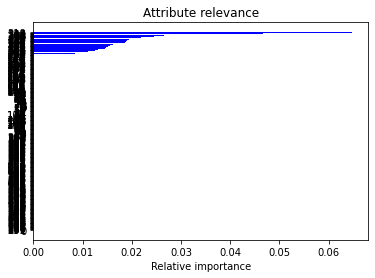

0 = 0.0
1 = 0.014270615253210129
2 = 0.0
3 = 0.0
4 = 0.0
5 = 0.0
6 = 0.0
7 = 0.0
8 = 0.0
9 = 0.0
10 = 0.0
11 = 0.0
12 = 0.0
13 = 0.0
14 = 0.0
15 = 0.0
16 = 0.0
17 = 0.01886270514137343
18 = 0.0
19 = 0.0
20 = 0.0
21 = 0.0
22 = 0.0
23 = 0.0
24 = 0.0
25 = 0.024595829906455445
26 = 0.0
27 = 0.0
28 = 0.0
29 = 0.0
30 = 0.0
31 = 0.02913131135869355
32 = 0.0
33 = 0.0
34 = 0.0
35 = 0.011045700965631075
36 = 0.0
37 = 0.0
38 = 0.034019085559175564
39 = 0.0
40 = 0.0
41 = 0.0
42 = 0.0
43 = 0.0
44 = 0.0
45 = 0.0
46 = 0.0
47 = 0.0
48 = 0.0
49 = 0.0
50 = 0.0
51 = 0.0
52 = 0.0
53 = 0.0
54 = 0.0
55 = 0.0
56 = 0.0
57 = 0.01730596759245986
58 = 0.0
59 = 0.0
60 = 0.0
61 = 0.0
62 = 0.0
63 = 0.0
64 = 0.0
65 = 0.0
66 = 0.0
67 = 0.0
68 = 0.0
69 = 0.0
70 = 0.0
71 = 0.019541094716505968
72 = 0.020358978629019905
73 = 0.0
74 = 0.0
75 = 0.015435755660774536
76 = 0.0
77 = 0.0
78 = 0.0
79 = 0.0
80 = 0.019058417138197014
81 = 0.0
82 = 0.0
83 = 0.0
84 = 0.035810649198728
85 = 0.0
86 = 0.014607685946628604
87 = 0.0
88 

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.